In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import requests
import urllib3

%matplotlib inline

In [68]:
bookid = 34321
url = 'http://hedonometer.org/data/bookdata/gutenberg-007/'+ str(bookid) +'.csv'
# http://hedonometer.org/data/bookdata/gutenberg-007/30637.csv
# 对应情感阈值 [4,6]
# lower = 2668
# upper = 9159
lower = 2591
upper = 9179
bookfile = pd.read_csv('./books/'+str(bookid)+'.csv', header=None, skiprows=range(lower, upper))
scorefile = pd.read_csv('labMTscores-english.csv', header=None, skiprows=range(lower, upper))

In [69]:
ds = pd.DataFrame(scorefile)
scores = np.array(ds).squeeze()

In [70]:
def generate_timeseries(bookfile):
    book = pd.DataFrame(boofile)
    length = 200
    minWindows = 10
    timeseries = np.zeros(length-minWindows+1)
    begtimeseries = np.zeros(int(minWindows/2))
    endtimeseries = np.zeros(int(minWindows/2))
    N = 0
    freq = np.zeros(book.shape[0])
    for j in range(int(minWindows/2)):
        freq += book[j]
    for j in range(int(minWindows/2), minWindows):
        N = np.sum(freq)
        happs = np.sum(scores*freq)
        begtimeseries[j-int(minWindows/2)] = happs/N
        freq += book[j]
    happs = np.sum(freq * scores)
    N = np.sum(freq)
    timeseries[0] = happs/N
    for j in range(1, length-minWindows+1):
        freq += book[j+minWindows-1]
        freq -= book[j-1]
        happs = np.sum(scores*freq)
        N = np.sum(freq)
        timeseries[j] = happs/N
    for j in range(length-minWindows+1, length):
        freq -= book[j-1]
        happs = np.sum(scores*freq)
        N = np.sum(freq)
        endtimeseries[j-length+int(minWindows/2)-1] = happs/N
    return timeseries

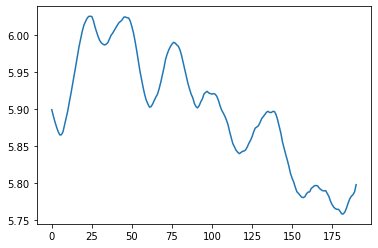

In [76]:
plt.plot(timeseries)

In [77]:
def cal_surprise(timeseries):
    l = timeseries.shape[0]
    sur = 0
    for i in range(1, l):
        sur += abs(timeseries[i] - timeseries[i-1])
    return sur

In [3]:
import requests
from bs4 import BeautifulSoup
r = requests.get("http://hedonometer.org/books/v3/34318/?lens=[4,6]")
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.find_all('p')[7])

<p class="basicinfobox">
	    Title:
	    <br/>
	    Author:
	    <br/>
	    Language:
	    <br/>
	    Number of Words: 
	    <br/>
	    Average Happiness: 
	    <br/>
	    Taxonomy (detected story type): 
	    <br/>
	    Most Similar:
	    <br/>
	    Hedonometric Analysis:
	    <br/>
	    Hedonometer views:
	    <br/>
	    Project Gutenberg downloads:
	    <br/>
	    Project Gutenberg page:
	  </p>


In [4]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('user-agent="MQQBrowser/26 Mozilla/5.0 (Linux; U; Android 2.3.7; zh-cn; MB200 Build/GRJ22; CyanogenMod-7) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"')
options.add_argument('--disable-gpu') 
# 不加载图片, 提升速度
options.add_argument('blink-settings=imagesEnabled=false')
# 浏览器不提供可视化页面. linux下如果系统不支持可视化不加这条会启动失败
options.add_argument('--headless')
url = 'http://hedonometer.org/books/v3/34318/?lens=[4,6]'
path = './chromedriver'
driver = webdriver.Chrome(options=options, executable_path=path)
driver.get(url)
text = driver.find_element_by_class_name('basicinfobox')

In [67]:
url = 'http://hedonometer.org/data/bookdata/gutenberg-007/34322.csv'
driver.get(url)

In [9]:
text.text

'Title: Life Blood\nAuthor: Hoover, Thomas\nLanguage: English\nNumber of Words: 1,813,068\nAverage Happiness: 5.882\nDownloads from Project Gutenberg: 38\nExcluded from analysis: No\nHedonometric Analysis: hedonometer.org/books/v3/34318/\nProject Gutenberg page: gutenberg.org/ebooks/34318/'

In [13]:
def isSuspense(id):
    r = requests.get('https://www.gutenberg.org/ebooks/'+str(id))
    if r.text.find('Suspense fiction') != -1:
        return True
    return False

In [17]:
for i in range(65540):
    if isSuspense(34320)

True

In [51]:
# 从gutenburg爬取所有侦探小说的id
# r = requests.get('https://gutenberg.org/ebooks/results/?author=&title=&subject=Detective+Fiction&lang=en&category=&locc=&filetype=&submit_search=Search&pageno=9')
r = requests.get('https://gutenberg.org/ebooks/results/?author=&title=&subject=suspense&lang=en&category=&locc=&filetype=&submit_search=Search&pageno=1')
soup = BeautifulSoup(r.text, 'html.parser')
x = soup.find_all('td')
with open('./data/suspense.txt', 'a+') as f:
    for i in range(1000):
        try:
            f.write(str(x[i*5])[4:-5]+'\n')
        except:
            break

In [61]:
# 下载对应的情感弧文件
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('user-agent="MQQBrowser/26 Mozilla/5.0 (Linux; U; Android 2.3.7; zh-cn; MB200 Build/GRJ22; CyanogenMod-7) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"')
options.add_argument('--disable-gpu') 
# 不加载图片, 提升速度
options.add_argument('blink-settings=imagesEnabled=false')
# 浏览器不提供可视化页面. linux下如果系统不支持可视化不加这条会启动失败
options.add_argument('--headless')
path = '../../chromedriver'
driver = webdriver.Chrome(options=options, executable_path=path)
driver.get(url)
text = driver.find_element_by_class_name('basicinfobox')

In [ ]:
with open('../detective.txt', 'r') as f:
    a = f.readlines()
    for num in a:
        url = 'http://hedonometer.org/data/bookdata/gutenberg-007/' + num[:-1] + '.csv'
        driver.get(url)

In [65]:
import os
os.chdir('/Users/zinccat/Documents/2021春/rot3/data/detective')
os.getcwd()
files = os.listdir()
for bookfile in files:
url = 'http://hedonometer.org/books/v3/34318/?lens=[4,6]'


['223.csv', '15695.csv', '32564.csv', '43362.csv', '25781.csv', '42040.csv', '1748.csv', '9300.csv', '48948.csv', '31535.csv', '33242.csv', '34277.csv', '46178.csv', '2123.csv', '28448.csv', '1833.csv', '34934.csv', '1628.csv', '40722.csv', '4745.csv', '1601.csv', '1832.csv', '39544.csv', '49935.csv', '32439.csv', '35424.csv', '46623.csv', '37019.csv', '38470.csv', '20559.csv', '1563.csv', '45262.csv', '48034.csv', '28071.csv', '42069.csv', '5261.csv', '42902.csv', '34664.csv', '20611.csv', '35022.csv', '2097.csv', '7689.csv', '30827.csv', '45260.csv', '30833.csv', '19523.csv', '2861.csv', '2691.csv', '43765.csv', '33282.csv', '4223.csv', '46153.csv', '21876.csv', '34710.csv', '8155.csv', '10659.csv', '41402.csv', '1159.csv', '42137.csv', '45658.csv', '40721.csv', '2451.csv', '15720.csv', '42687.csv', '1831.csv', '12932.csv', '24933.csv', '27209.csv', '30832.csv', '25595.csv', '26063.csv', '7688.csv', '37146.csv', '23641.csv', '37378.csv', '28264.csv', '221.csv', '547.csv', '42907.csv'

In [66]:
# 下载对应的下载量
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('user-agent="MQQBrowser/26 Mozilla/5.0 (Linux; U; Android 2.3.7; zh-cn; MB200 Build/GRJ22; CyanogenMod-7) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"')
options.add_argument('--disable-gpu') 
# 不加载图片, 提升速度
options.add_argument('blink-settings=imagesEnabled=false')
# 浏览器不提供可视化页面. linux下如果系统不支持可视化不加这条会启动失败
options.add_argument('--headless')
path = '../../chromedriver'
driver = webdriver.Chrome(options=options, executable_path=path)
with open('../detective.txt', 'r') as f:
    a = f.readlines()
    for num in a:
        url = 'http://hedonometer.org/books/v3/' + num[:-1] + '/?lens=[4,6]'
        driver.get(url)
        print(driver.text)
        text = driver.find_element_by_class_name('basicinfobox')
        print(text)
        break

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".basicinfobox"}
  (Session info: headless chrome=91.0.4472.77)


In [79]:
# 整理爬到的数据
l = []
with open('../detective.txt', 'r') as f:
    a = f.readlines()
    for num in a:
        l.append(int(num))
l.sort()
with open('../sorted_detective.txt', 'a+') as f:
    for i in l:
        f.write(str(i))
        f.write('\n')

In [125]:
# 爬取下载量数据
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('user-agent="MQQBrowser/26 Mozilla/5.0 (Linux; U; Android 2.3.7; zh-cn; MB200 Build/GRJ22; CyanogenMod-7) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"')
options.add_argument('--disable-gpu') 
# 不加载图片, 提升速度
options.add_argument('blink-settings=imagesEnabled=false')
# 浏览器不提供可视化页面. linux下如果系统不支持可视化不加这条会启动失败
options.add_argument('--headless')
path = '../../chromedriver'
driver = webdriver.Chrome(options=options, executable_path=path)

flag = False
ans = 0
with open('../sorted_detective.txt', 'r') as f:
    with open('../detective_downloads.txt', 'a+') as g:
        a = f.readlines()
        for num in a:
            ans += 1
            # url = 'https://www.gutenberg.org/ebooks/' + num[:-1]
            # print(url)
            # driver.get(url)
            # text = driver.find_element_by_css_selector('td[itemprop="interactionCount"]')
            # position = text.text.find('dow')
            # if position != -1:
            #     downloads = text.text[:position-1]
            #     g.write(str(downloads)+'\n')
# driver.quit()
print(ans)

841
